In [23]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from utils import plotLosses,getActualAndPredictedOutput,trainModel,collate_fn
from RNNModel import RNNModel
from LSTMModel import LSTMModel
from HandWritingDataset import HandWritingDataset
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [12]:
GROUP_NO=3
#nGap will change the performance a lot.
nGap=2
batchSize=64

In [13]:
trainDataset=HandWritingDataset("./Handwriting_Data",GROUP_NO,nGap=nGap)
testDataset=HandWritingDataset("./Handwriting_Data",GROUP_NO,train=False,nGap=nGap)

trainDataloader=DataLoader(dataset=trainDataset,batch_size=batchSize,shuffle=True,collate_fn=collate_fn)
testDataloader=DataLoader(dataset=testDataset,batch_size=batchSize,shuffle=False,collate_fn=collate_fn)

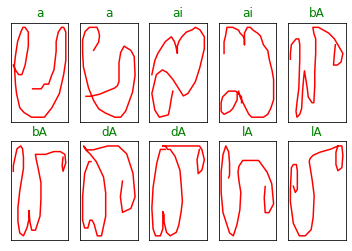

In [14]:
trainDataset.showChars()

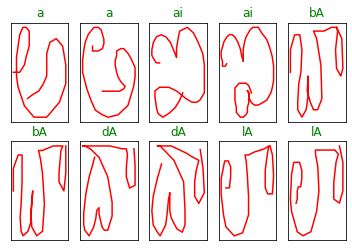

In [15]:
testDataset.showChars()

In [16]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Can change nFeatures and nLayers
rnn=RNNModel(128,2,trainDataset.numChars,3)
lstm=LSTMModel(128,2,trainDataset.numChars,3)
criterion=nn.CrossEntropyLoss()

#Changing LR changes the convergence of model.
optimizerRNN=torch.optim.Adam(rnn.parameters(),lr=1e-4)
optimizerLSTM=torch.optim.Adam(lstm.parameters(),lr=1e-4)
threshold=1e-5

In [17]:
rnn, trainLossesRNN, testLossesRNN=trainModel(device,rnn,criterion,optimizerRNN,threshold,trainDataloader,trainDataset,testDataloader,testDataset)



Epoch #1 ------------------------------
Train Loss: 1.614168650902395
Previous Training Loss: 0
Test Loss: 1.609717879295349

Epoch #2 ------------------------------
Train Loss: 1.6094526824033644
Previous Training Loss: 1.614168650902395
Test Loss: 1.6062332677841187

Epoch #3 ------------------------------
Train Loss: 1.6065552477933922
Previous Training Loss: 1.6094526824033644
Test Loss: 1.6025587320327759

Epoch #4 ------------------------------
Train Loss: 1.6025725293785074
Previous Training Loss: 1.6065552477933922
Test Loss: 1.5977651119232177

Epoch #5 ------------------------------
Train Loss: 1.598135431375865
Previous Training Loss: 1.6025725293785074
Test Loss: 1.59073579788208

Epoch #6 ------------------------------
Train Loss: 1.5910199904928402
Previous Training Loss: 1.598135431375865
Test Loss: 1.5790030813217164

Epoch #7 ------------------------------
Train Loss: 1.580776251439798
Previous Training Loss: 1.5910199904928402
Test Loss: 1.5586366748809815

Epoch #8 

Train Loss: 0.8745619996991172
Previous Training Loss: 0.8553307709819026
Test Loss: 0.6817481184005737

Epoch #59 ------------------------------
Train Loss: 0.8538729258250912
Previous Training Loss: 0.8745619996991172
Test Loss: 0.6561536622047425

Epoch #60 ------------------------------
Train Loss: 0.8550342399594387
Previous Training Loss: 0.8538729258250912
Test Loss: 0.6571026849746704

Epoch #61 ------------------------------
Train Loss: 0.8368474404943927
Previous Training Loss: 0.8550342399594387
Test Loss: 0.6439657616615295

Epoch #62 ------------------------------
Train Loss: 0.8269570892128235
Previous Training Loss: 0.8368474404943927
Test Loss: 0.6545955657958984

Epoch #63 ------------------------------
Train Loss: 0.8173284878188598
Previous Training Loss: 0.8269570892128235
Test Loss: 0.6543780612945557

Epoch #64 ------------------------------
Train Loss: 0.8285896830239032
Previous Training Loss: 0.8173284878188598
Test Loss: 0.647880449295044

Epoch #65 ----------

Train Loss: 0.6006411345290026
Previous Training Loss: 0.6099755543313986
Test Loss: 0.4747233057022095

Epoch #116 ------------------------------
Train Loss: 0.6054905343681313
Previous Training Loss: 0.6006411345290026
Test Loss: 0.467103385925293

Epoch #117 ------------------------------
Train Loss: 0.5983517008342131
Previous Training Loss: 0.6054905343681313
Test Loss: 0.5109872210025788

Epoch #118 ------------------------------
Train Loss: 0.60194966727026
Previous Training Loss: 0.5983517008342131
Test Loss: 0.46791658639907835

Epoch #119 ------------------------------
Train Loss: 0.5982324465370734
Previous Training Loss: 0.60194966727026
Test Loss: 0.5346273279190064

Epoch #120 ------------------------------
Train Loss: 0.599958673684312
Previous Training Loss: 0.5982324465370734
Test Loss: 0.4600244092941284

Epoch #121 ------------------------------
Train Loss: 0.606756581856975
Previous Training Loss: 0.599958673684312
Test Loss: 0.5149473726749421

Epoch #122 ---------

Train Loss: 0.37006763762009737
Previous Training Loss: 0.4140174626087656
Test Loss: 0.3213170289993286

Epoch #172 ------------------------------
Train Loss: 0.3936089824657051
Previous Training Loss: 0.37006763762009737
Test Loss: 0.3244361770153046

Epoch #173 ------------------------------
Train Loss: 0.4022868685750155
Previous Training Loss: 0.3936089824657051
Test Loss: 0.3148795747756958

Epoch #174 ------------------------------
Train Loss: 0.3758222205298288
Previous Training Loss: 0.4022868685750155
Test Loss: 0.317035493850708

Epoch #175 ------------------------------
Train Loss: 0.38282576185968803
Previous Training Loss: 0.3758222205298288
Test Loss: 0.33915364027023315

Epoch #176 ------------------------------
Train Loss: 0.3743657396764171
Previous Training Loss: 0.38282576185968803
Test Loss: 0.3032475244998932

Epoch #177 ------------------------------
Train Loss: 0.44696771090649307
Previous Training Loss: 0.3743657396764171
Test Loss: 0.3151342296600342

Epoch #1

Train Loss: 0.2781349387530335
Previous Training Loss: 0.30580738351921993
Test Loss: 0.1825556156039238

Epoch #228 ------------------------------
Train Loss: 0.2838006023502211
Previous Training Loss: 0.2781349387530335
Test Loss: 0.18336859166622163

Epoch #229 ------------------------------
Train Loss: 0.27157143271004147
Previous Training Loss: 0.2838006023502211
Test Loss: 0.19347455501556396

Epoch #230 ------------------------------
Train Loss: 0.27781449697108035
Previous Training Loss: 0.27157143271004147
Test Loss: 0.1749554181098938

Epoch #231 ------------------------------
Train Loss: 0.24031834026293575
Previous Training Loss: 0.27781449697108035
Test Loss: 0.26466468930244447

Epoch #232 ------------------------------
Train Loss: 0.24333623338371255
Previous Training Loss: 0.24031834026293575
Test Loss: 0.2142706561088562

Epoch #233 ------------------------------
Train Loss: 0.2297726823098458
Previous Training Loss: 0.24333623338371255
Test Loss: 0.21134526550769805



Train Loss: 0.16168804673081585
Previous Training Loss: 0.17294992980039503
Test Loss: 0.2131623837351799

Epoch #283 ------------------------------
Train Loss: 0.1638259427192955
Previous Training Loss: 0.16168804673081585
Test Loss: 0.22531555563211442

Epoch #284 ------------------------------
Train Loss: 0.1615662895381972
Previous Training Loss: 0.1638259427192955
Test Loss: 0.18478962302207946

Epoch #285 ------------------------------
Train Loss: 0.1630054441750397
Previous Training Loss: 0.1615662895381972
Test Loss: 0.22862719088792802

Epoch #286 ------------------------------
Train Loss: 0.16064326562877995
Previous Training Loss: 0.1630054441750397
Test Loss: 0.2084273087978363

Epoch #287 ------------------------------
Train Loss: 0.1622719273796582
Previous Training Loss: 0.16064326562877995
Test Loss: 0.22684679597616195

Epoch #288 ------------------------------
Train Loss: 0.15624904414264176
Previous Training Loss: 0.1622719273796582
Test Loss: 0.2394995978474617

Epo

In [18]:
lstm, trainLossesLSTM, testLossesLSTM=trainModel(device,lstm,criterion,optimizerLSTM,threshold,trainDataloader,trainDataset,testDataloader,testDataset)


Epoch #1 ------------------------------
Train Loss: 1.6105682078325365
Previous Training Loss: 0
Test Loss: 1.6102176427841186

Epoch #2 ------------------------------
Train Loss: 1.610173641418924
Previous Training Loss: 1.6105682078325365
Test Loss: 1.6098742866516114

Epoch #3 ------------------------------
Train Loss: 1.609911608278925
Previous Training Loss: 1.610173641418924
Test Loss: 1.6095866823196412

Epoch #4 ------------------------------
Train Loss: 1.6095144077918273
Previous Training Loss: 1.609911608278925
Test Loss: 1.6093240928649903

Epoch #5 ------------------------------
Train Loss: 1.6092937576527497
Previous Training Loss: 1.6095144077918273
Test Loss: 1.6090572261810303

Epoch #6 ------------------------------
Train Loss: 1.609079020016395
Previous Training Loss: 1.6092937576527497
Test Loss: 1.6087458992004395

Epoch #7 ------------------------------
Train Loss: 1.608767415622233
Previous Training Loss: 1.609079020016395
Test Loss: 1.608363904953003

Epoch #8 

Train Loss: 0.5741640018304652
Previous Training Loss: 0.604946449789987
Test Loss: 0.45000914096832273

Epoch #59 ------------------------------
Train Loss: 0.5706087298712994
Previous Training Loss: 0.5741640018304652
Test Loss: 0.38807554960250856

Epoch #60 ------------------------------
Train Loss: 0.5344337361373289
Previous Training Loss: 0.5706087298712994
Test Loss: 0.41176578402519226

Epoch #61 ------------------------------
Train Loss: 0.5436085015100919
Previous Training Loss: 0.5344337361373289
Test Loss: 0.38982577800750734

Epoch #62 ------------------------------
Train Loss: 0.5160207197548001
Previous Training Loss: 0.5436085015100919
Test Loss: 0.3632296550273895

Epoch #63 ------------------------------
Train Loss: 0.5057625681943866
Previous Training Loss: 0.5160207197548001
Test Loss: 0.39086959362030027

Epoch #64 ------------------------------
Train Loss: 0.5006026952329252
Previous Training Loss: 0.5057625681943866
Test Loss: 0.42461958050727844

Epoch #65 ----

Train Loss: 0.3312872758151491
Previous Training Loss: 0.2570908761667441
Test Loss: 0.30551271080970765

Epoch #115 ------------------------------
Train Loss: 0.2658067462916972
Previous Training Loss: 0.3312872758151491
Test Loss: 0.2810585284233093

Epoch #116 ------------------------------
Train Loss: 0.3281102919022474
Previous Training Loss: 0.2658067462916972
Test Loss: 0.2606286668777466

Epoch #117 ------------------------------
Train Loss: 0.3239643037232296
Previous Training Loss: 0.3281102919022474
Test Loss: 0.29935102224349974

Epoch #118 ------------------------------
Train Loss: 0.297176197084324
Previous Training Loss: 0.3239643037232296
Test Loss: 0.28380781650543213

Epoch #119 ------------------------------
Train Loss: 0.29910377962596213
Previous Training Loss: 0.297176197084324
Test Loss: 0.2062464201450348

Epoch #120 ------------------------------
Train Loss: 0.29100121557712555
Previous Training Loss: 0.29910377962596213
Test Loss: 0.311240234375

Epoch #121 --

Train Loss: 0.18010399792528015
Previous Training Loss: 0.1916617506968384
Test Loss: 0.19557270884513855

Epoch #171 ------------------------------
Train Loss: 0.1768463129291729
Previous Training Loss: 0.18010399792528015
Test Loss: 0.1468959391117096

Epoch #172 ------------------------------
Train Loss: 0.1606716231901861
Previous Training Loss: 0.1768463129291729
Test Loss: 0.15724949061870575

Epoch #173 ------------------------------
Train Loss: 0.16112676835225206
Previous Training Loss: 0.1606716231901861
Test Loss: 0.15271385312080382

Epoch #174 ------------------------------
Train Loss: 0.1651743658690689
Previous Training Loss: 0.16112676835225206
Test Loss: 0.1352866530418396

Epoch #175 ------------------------------
Train Loss: 0.15722416823528945
Previous Training Loss: 0.1651743658690689
Test Loss: 0.16253048181533813

Epoch #176 ------------------------------
Train Loss: 0.1524299440943465
Previous Training Loss: 0.15722416823528945
Test Loss: 0.13718027889728546

Ep

Train Loss: 0.1143839506828837
Previous Training Loss: 0.1176022844437955
Test Loss: 0.0965125560760498

Epoch #226 ------------------------------
Train Loss: 0.11207152729305513
Previous Training Loss: 0.1143839506828837
Test Loss: 0.14476761102676391

Epoch #227 ------------------------------
Train Loss: 0.10654293970576875
Previous Training Loss: 0.11207152729305513
Test Loss: 0.10145523905754089

Epoch #228 ------------------------------
Train Loss: 0.10378921051501533
Previous Training Loss: 0.10654293970576875
Test Loss: 0.1290404072403908

Epoch #229 ------------------------------
Train Loss: 0.10035482268378616
Previous Training Loss: 0.10378921051501533
Test Loss: 0.1009995996952057

Epoch #230 ------------------------------
Train Loss: 0.10011328673180268
Previous Training Loss: 0.10035482268378616
Test Loss: 0.12272951483726502

Epoch #231 ------------------------------
Train Loss: 0.0979805875450112
Previous Training Loss: 0.10011328673180268
Test Loss: 0.09898249089717864


Train Loss: 0.07977767731809755
Previous Training Loss: 0.08088755946465206
Test Loss: 0.05913422532379627

Epoch #281 ------------------------------
Train Loss: 0.07639375430024052
Previous Training Loss: 0.07977767731809755
Test Loss: 0.07049197942018509

Epoch #282 ------------------------------
Train Loss: 0.07658399509010788
Previous Training Loss: 0.07639375430024052
Test Loss: 0.05739609092473984

Epoch #283 ------------------------------
Train Loss: 0.07172599847566977
Previous Training Loss: 0.07658399509010788
Test Loss: 0.05047486260533333

Epoch #284 ------------------------------
Train Loss: 0.0726842205569626
Previous Training Loss: 0.07172599847566977
Test Loss: 0.04612894400954246

Epoch #285 ------------------------------
Train Loss: 0.07063150649439576
Previous Training Loss: 0.0726842205569626
Test Loss: 0.04134113479405641

Epoch #286 ------------------------------
Train Loss: 0.07106810082673332
Previous Training Loss: 0.07063150649439576
Test Loss: 0.0600857762992

Train Loss: 0.09897597722774344
Previous Training Loss: 0.10845313143017689
Test Loss: 0.05711930342018604

Epoch #336 ------------------------------
Train Loss: 0.1076430217648039
Previous Training Loss: 0.09897597722774344
Test Loss: 0.06506020903587341

Epoch #337 ------------------------------
Train Loss: 0.0991273274748388
Previous Training Loss: 0.1076430217648039
Test Loss: 0.05885541677474976

Epoch #338 ------------------------------
Train Loss: 0.0842309062838902
Previous Training Loss: 0.0991273274748388
Test Loss: 0.06299143821001053

Epoch #339 ------------------------------
Train Loss: 0.08920155047458045
Previous Training Loss: 0.0842309062838902
Test Loss: 0.04409715414047241

Epoch #340 ------------------------------
Train Loss: 0.07435837083933305
Previous Training Loss: 0.08920155047458045
Test Loss: 0.05788553975522518

Epoch #341 ------------------------------
Train Loss: 0.07071365663407062
Previous Training Loss: 0.07435837083933305
Test Loss: 0.09563369873911143

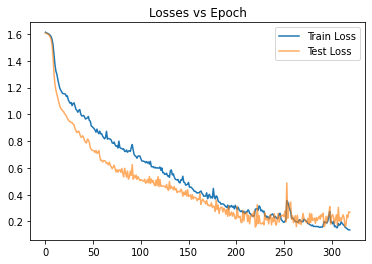

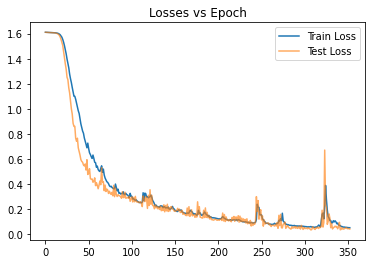

In [19]:
plotLosses(trainLossesRNN,testLossesRNN)
plotLosses(trainLossesLSTM,testLossesLSTM)

In [20]:
predTrainRNN,actTrainRNN=getActualAndPredictedOutput(rnn,device,trainDataloader)
predTestRNN,actTestRNN=getActualAndPredictedOutput(rnn,device,testDataloader)

predTrainLSTM,actTrainLSTM=getActualAndPredictedOutput(lstm,device,trainDataloader)
predTestLSTM,actTestLSTM=getActualAndPredictedOutput(lstm,device,testDataloader)

In [21]:
print("For RNN")
print(f"Accuracy on Train Set: {accuracy_score(actTrainRNN,predTrainRNN)}")
print(f"Accuracy on Test Set: {accuracy_score(actTestRNN,predTestRNN)}")

print("For LSTM")
print(f"Accuracy on Train Set: {accuracy_score(actTrainLSTM,predTrainLSTM)}")
print(f"Accuracy on Test Set: {accuracy_score(actTestLSTM,predTestLSTM)}")

For RNN
Accuracy on Train Set: 0.9620991253644315
Accuracy on Test Set: 0.94
For LSTM
Accuracy on Train Set: 0.9825072886297376
Accuracy on Test Set: 0.97


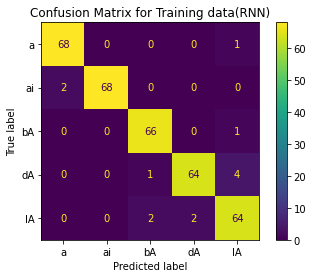

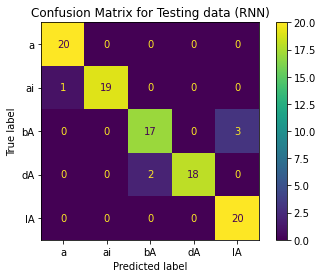

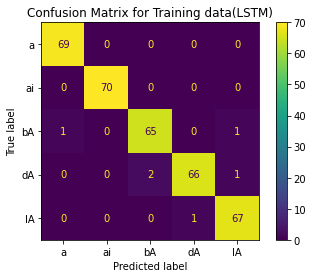

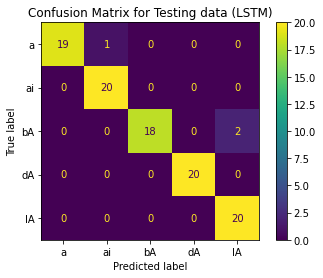

In [22]:
cmTrainRNN=confusion_matrix(actTrainRNN,predTrainRNN)
cmTEstRNN=confusion_matrix(actTestRNN,predTestRNN)

dispTrainRNN=ConfusionMatrixDisplay(cmTrainRNN,display_labels=trainDataset.chars)
dispTrainRNN.plot()
plt.title(f"Confusion Matrix for Training data(RNN)")
plt.show()

dispTestRNN=ConfusionMatrixDisplay(cmTEstRNN,display_labels=testDataset.chars)
dispTestRNN.plot()
plt.title(f"Confusion Matrix for Testing data (RNN)")
plt.show()

cmTrainLSTM=confusion_matrix(actTrainLSTM,predTrainLSTM)
cmTEstLSTM=confusion_matrix(actTestLSTM,predTestLSTM)

dispTrainLSTM=ConfusionMatrixDisplay(cmTrainLSTM,display_labels=trainDataset.chars)
dispTrainLSTM.plot()
plt.title(f"Confusion Matrix for Training data(LSTM)")
plt.show()

dispTestLSTM=ConfusionMatrixDisplay(cmTEstLSTM,display_labels=testDataset.chars)
dispTestLSTM.plot()
plt.title(f"Confusion Matrix for Testing data (LSTM)")
plt.show()
